# Keras 

IT is a model-level library, providing high-level building blocks for developing deep learning models. 

It does not handle low-level operations such as tensor products, convolutions and so on itself. 

Instead, it relies on a specialized, well optimized tensor manipulation library to do so, serving as the "backend engine" of Keras. 

Rather than picking one single tensor library and making the implementation of Keras tied to that library, Keras handles the problem in a modular way, and several different backend engines can be plugged seamlessly into Keras.

At this time, Keras has three backend implementations available: the TensorFlow backend, the Theano backend, and the CNTK backend.

- TensorFlow is an open-source symbolic tensor manipulation framework developed by Google.

- Theano is an open-source symbolic tensor manipulation framework developed by LISA Lab at Université de Montréal.

- CNTK is an open-source toolkit for deep learning developed by Microsoft.


# DENSE LAYER 

Just your regular densely-connected NN layer.

Dense implements the operation: output = activation(dot(input, kernel) + bias) where activation is the element-wise activation function passed as the activation argument, kernel is a weights matrix created by the layer, and bias is a bias vector created by the layer (only applicable if use_bias is True).

Note: if the input to the layer has a rank greater than 2, then it is flattened prior to the initial dot product with kernel.

In [1]:
import numpy as np
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from keras.layers import Dense,Activation
from keras.models import Sequential
import keras
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


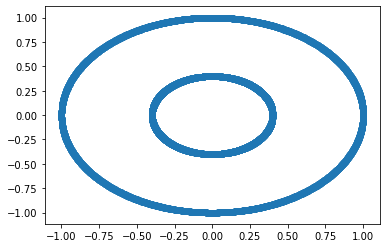

(4000, 2)
(4000,)


In [2]:
# making our own custom dataset
X, Y = make_circles(n_samples=4000, factor=0.4)

plt.scatter(X[:, 0], X[:, 1])
plt.show()
print(X.shape)
print(Y.shape)


# to_categorical

keras.utils.to_categorical(y, num_classes=None, dtype='float32')

Converts a class vector (integers) to binary class matrix.

E.g. for use with categorical_crossentropy.

Arguments


y: class vector to be converted into a matrix (integers from 0 to num_classes).

num_classes: total number of classes.

dtype: The data type expected by the input, as a string (float32, float64, int32...)

Returns


A binary matrix representation of the input. The classes axis is placed last.



In [3]:
# train and test splitting the data

x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)
y_train=keras.utils.to_categorical(y_train,2)
y_test=keras.utils.to_categorical(y_test,2)
x_train.shape

(3200, 2)

In [4]:
# making neural network 
model = Sequential()
model.add(Dense(5, input_shape=(2,)))
model.add(Activation('relu'))
model.add(Dense(2))
model.add(Activation('softmax'))
model.summary()

InternalError: cudaGetDevice() failed. Status: cudaGetErrorString symbol not found.

In [5]:
model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

InternalError: cudaGetDevice() failed. Status: cudaGetErrorString symbol not found.

In [6]:
model.fit(x_train,y_train,batch_size=16,epochs=20,verbose=1)

Epoch 1/20
3200/3200 [==============================] - 0s 142us/step - loss: 0.6469 - acc: 0.6144
Epoch 2/20
3200/3200 [==============================] - 0s 75us/step - loss: 0.6009 - acc: 0.7700
Epoch 3/20
3200/3200 [==============================] - 0s 110us/step - loss: 0.5492 - acc: 0.8906
Epoch 4/20
3200/3200 [==============================] - 0s 125us/step - loss: 0.4925 - acc: 0.9578
Epoch 5/20
3200/3200 [==============================] - 0s 76us/step - loss: 0.4330 - acc: 0.9788
Epoch 6/20
3200/3200 [==============================] - 0s 76us/step - loss: 0.3738 - acc: 0.9994
Epoch 7/20
3200/3200 [==============================] - 0s 100us/step - loss: 0.3177 - acc: 1.0000
Epoch 8/20
3200/3200 [==============================] - 0s 101us/step - loss: 0.2676 - acc: 1.0000
Epoch 9/20
3200/3200 [==============================] - 0s 77us/step - loss: 0.2244 - acc: 1.0000
Epoch 10/20
3200/3200 [==============================] - 0s 79us/step - loss: 0.1880 - acc: 1.0000
Epoch 11/20
32

In [7]:
score = model.evaluate(x_test, y_test,verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.032209944278001786
Test accuracy: 1.0
